In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# x_start = 0
# x_stop = 9
# h = 0.05
# x_index = h*np.square(np.arange(0,20))
# y_base = np.sin(x_index)
# plt.scatter(x_index*h,y_base)

In [22]:
d = 1
x_norm = np.arange(0,21,0.1)
y_norm = np.sin(x_norm)
x_ravn = np.arange(0,21,d)
y_ravn = np.sin(x_ravn)
x_ravn0 = -d
y_ravn0 = np.sin(x_ravn0)

x_ravn = np.hstack((x_ravn0,x_ravn))
y_ravn = np.hstack((y_ravn0,y_ravn))

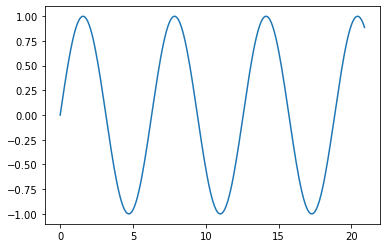

In [23]:
plt.plot(x_norm,y_norm)

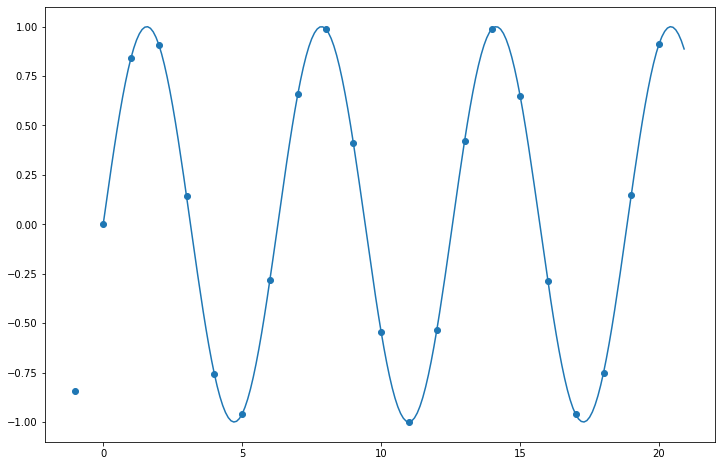

In [24]:
plt.figure(figsize=(12,8))
plt.plot(x_norm,y_norm)

plt.scatter(x_ravn,y_ravn)

In [25]:
# alpha = np.zeros(20)
# alpha[2] = - 1/4
# beta = np.zeros(20)
# d = np.zeros(20)
# d = x_index[1:] - x_index[:-1]
# # beta[2] = /1

In [26]:
alpha = np.zeros(x_ravn.shape[0])
beta = np.zeros(x_ravn.shape[0])

In [27]:
A = 1
B = 4
C = 1
F = np.insert(np.array(y_ravn[2::1]-y_ravn[0:-2:1]),0,10)

alpha[2]= - C/B
beta[2] = 3/(B*d) * F[1]
          #F[1] = (y_ravn[2] - y_ravn[0])
for i in range(2,alpha.shape[0]-1):
    # print(i)
    alpha[i+1] = - C/B * 1/(1+ alpha[i]*A/B)
    beta[i+1] = (F[i]-A*beta[i])/(A*alpha[i]+B)

In [28]:
a = np.zeros(alpha.shape[0])
a[alpha.shape[0]-2] = (F[alpha.shape[0]-2] - A*beta[alpha.shape[0]-2])/(A*alpha[alpha.shape[0]-2]+B)
for i in range(alpha.shape[0]-3,0,-1):
    try:
        a[i-1] = alpha[i]*a[i] - beta[i]
    except:
        print('end')

In [29]:
b = np.zeros(alpha.shape[0])
c = np.zeros(alpha.shape[0])
for i in range(0,alpha.shape[0]-1):
    b[i] = 2/d**2 * (3*y_ravn[i+1] - 3*y_ravn[i] -2*a[i] - a[i+1]*d)
    c[i] = 6/d**3 * (a[i+1]*d + a[i]*d - 2*y_ravn[i+1] +2*y_ravn[i])

In [30]:
N_inter = 10000
y = np.zeros(N_inter*alpha.shape[0]-2)
x = np.zeros(N_inter*alpha.shape[0]-2)

In [31]:
c[2] = 0
c[alpha.shape[0]-1] = 0
for k in range(1,alpha.shape[0]-1):
    dx = np.linspace(start=0,stop=x_ravn[k+1]-x_ravn[k],num=N_inter)
    yk = y_ravn[k] + a[k]*dx + b[k] * (dx**2)/2 + (c[k]*dx**3)/6
    y[k*N_inter:N_inter*(k+1)] = yk
    x[k*N_inter:N_inter*(k+1)] = dx + x_ravn[k]
y = y[N_inter:-N_inter]
x = x[N_inter:-N_inter]

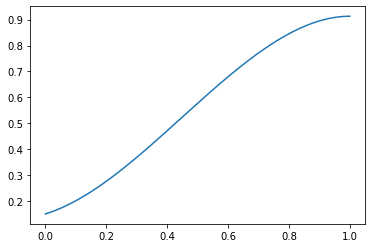

In [32]:
plt.plot(dx,yk)

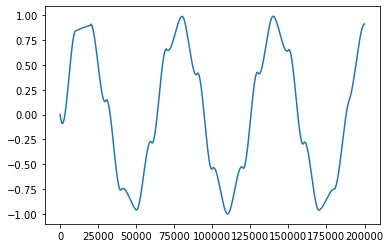

In [33]:
plt.plot(y)

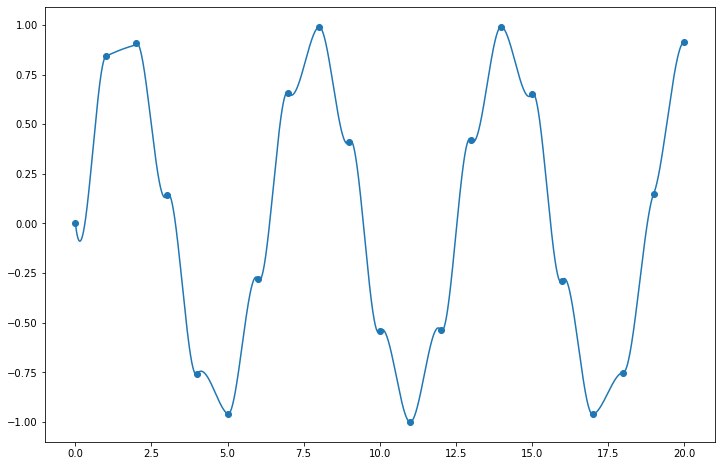

In [34]:
plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.scatter(x_ravn[1:],y_ravn[1:])
plt.savefig('interpolate')

In [35]:
# x = x[x!=0]
# y = y[y!=0]

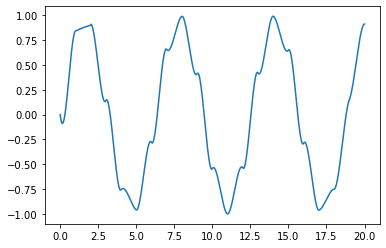

In [36]:
try:
    plt.plot(x[x!=0],y[y!=0])
except:
    None

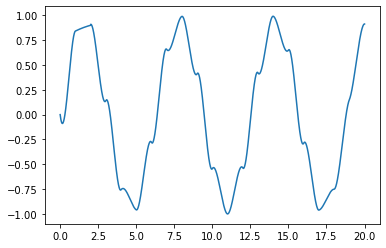

In [37]:
plt.plot(x,y)

In [38]:

alpha.shape[0]

22